# Driver indetification
Driver identification is a topic that recently has become more popular in the research community. I would attribute this to prevelance of machine learning and data.  
I am working on this topic for more than two years now. About last year I stumbled upon a paper from Korean authors. After skimming over the results section I was surprised, they had managed to obtain 99.6% accuracy with a dataset oof sampling rate oof 1Hz, to me that was not possible, oor at least it seemed very odd.  
I kept on reading more in the details too see if I figure ouot how they manage to get such good results, they hadn't used any fancy algorithms, or feature extractioon schemes. However loooking at some oof the feature plots, I noticed they have metrics such as Long/Shoort term fuel bank trim, these are ways vehicle makes sure the right mixture of oxygen and fuel goes in the engine. In addition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../../datasets/kwak.csv')

In [9]:
dataset.head()

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,...,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1


In [45]:
list(dataset.columns)

['Fuel_consumption',
 'Accelerator_Pedal_value',
 'Throttle_position_signal',
 'Short_Term_Fuel_Trim_Bank1',
 'Intake_air_pressure',
 'Filtered_Accelerator_Pedal_value',
 'Absolute_throttle_position',
 'Engine_soacking_time',
 'Inhibition_of_engine_fuel_cut_off',
 'Engine_in_fuel_cut_off',
 'Fuel_Pressure',
 'Long_Term_Fuel_Trim_Bank1',
 'Engine_speed',
 'Engine_torque_after_correction',
 'Torque_of_friction',
 'Flywheel_torque_(after_torque_interventions)',
 'Current_spark_timing',
 'Engine_coolant_temperature',
 'Engine_Idel_Target_Speed',
 'Engine_torque',
 'Calculated_LOAD_value',
 'Minimum_indicated_engine_torque',
 'Maximum_indicated_engine_torque',
 'Flywheel_torque',
 'Torque_scaling_factor(standardization)',
 'Standard_Torque_Ratio',
 'Requested_spark_retard_angle_from_TCU',
 'TCU_requests_engine_torque_limit_(ETL)',
 'TCU_requested_engine_RPM_increase',
 'Target_engine_speed_used_in_lock-up_module',
 'Glow_plug_control_request',
 'Activation_of_Air_compressor',
 'Torque_conve

In [24]:
cols_to_keep = list(dataset.columns)

In [29]:
cols_to_keep = [col for col in cols_to_keep if not col.startswith('Wheel_velocity')]

In [35]:
cols_to_keep = [
 'Fuel_consumption',
 'Accelerator_Pedal_value',
 'Throttle_position_signal',
 'Short_Term_Fuel_Trim_Bank1',
 'Intake_air_pressure',
 'Filtered_Accelerator_Pedal_value',
 'Absolute_throttle_position',
 'Engine_soacking_time',
 'Inhibition_of_engine_fuel_cut_off',
 'Engine_in_fuel_cut_off',
 'Fuel_Pressure',
 'Long_Term_Fuel_Trim_Bank1',
 'Engine_speed',
 'Engine_torque_after_correction',
 'Torque_of_friction',
 'Flywheel_torque_(after_torque_interventions)',
 #'Current_spark_timing',
 'Engine_coolant_temperature',
 'Engine_Idel_Target_Speed',
 'Engine_torque',
 'Calculated_LOAD_value',
 'Minimum_indicated_engine_torque',
 'Maximum_indicated_engine_torque',
 'Flywheel_torque',
 'Torque_scaling_factor(standardization)',
 'Standard_Torque_Ratio',
 'Requested_spark_retard_angle_from_TCU',
 'TCU_requests_engine_torque_limit_(ETL)',
 'TCU_requested_engine_RPM_increase',
 'Target_engine_speed_used_in_lock-up_module',
 #'Glow_plug_control_request',
 'Activation_of_Air_compressor',
 'Torque_converter_speed',
 'Current_Gear',
 'Engine_coolant_temperature.1',
 'Torque_converter_turbine_speed_-_Unfiltered',
 #'Clutch_operation_acknowledge',
 #'Converter_clutch',
 #'Gear_Selection',
 'Vehicle_speed',
 'Acceleration_speed_-_Longitudinal',
 #'Indication_of_brake_switch_ON/OFF',
 'Master_cylinder_pressure',
 'Calculated_road_gradient',
 #'Acceleration_speed_-_Lateral',
 #'Steering_wheel_speed',
 #'Steering_wheel_angle',
 #'Time(s)',
 #'Class',
 #'PathOrder'
]

In [27]:
cols_to_keep.delete('PathOrder')

AttributeError: 'list' object has no attribute 'delete'

In [36]:
corr = dataset[cols_to_keep].corr()

In [37]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [38]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

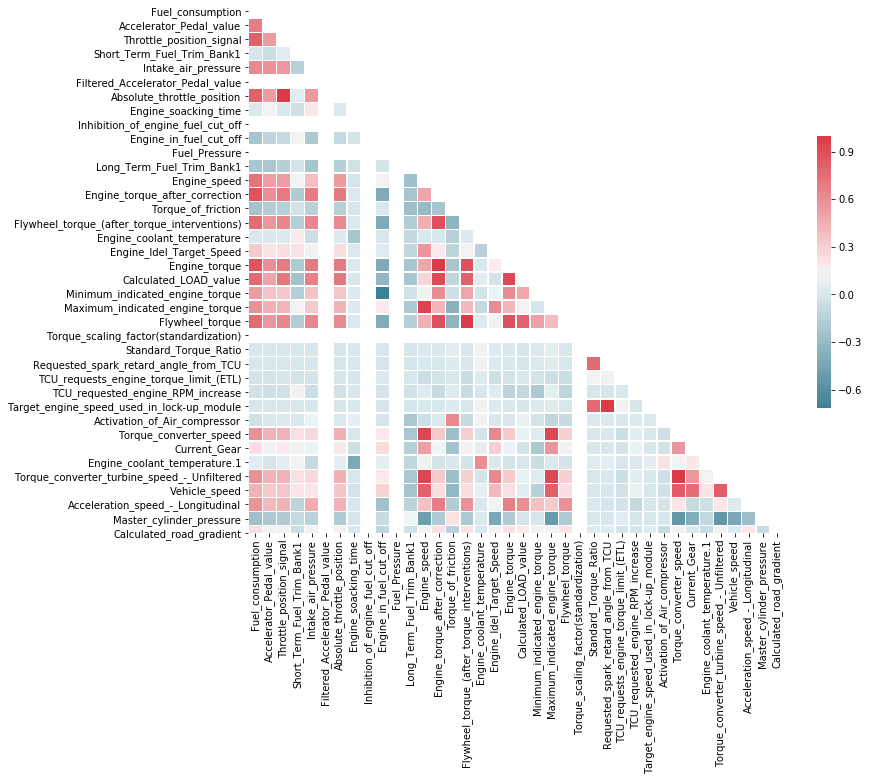

In [39]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap=cmap, mask=mask, square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

In [40]:
dataset.head(20)

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,...,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1
5,243.2,0.0,5.7,0.0,41,0,13.7,3,0,0,...,0.0,2,36.7,0.0,-0.2,0,-3.4,6,A,1
6,217.6,0.0,5.7,0.0,42,0,13.7,3,0,0,...,0.0,2,61.8,0.0,-0.2,0,-3.6,7,A,1
7,294.4,0.0,6.6,0.0,52,0,14.5,3,0,0,...,0.0,2,38.9,0.0,-0.2,0,-1.6,8,A,1
8,332.8,0.0,7.1,0.0,60,0,14.5,3,0,0,...,0.0,2,12.5,0.0,-0.2,8,7.9,9,A,1
9,358.4,0.0,7.1,0.8,65,0,14.9,3,0,0,...,-0.1,2,1.8,0.0,-0.2,0,7.7,10,A,1


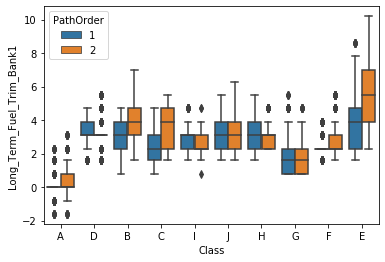

In [41]:
sns.boxplot(data=dataset, x='Class', y='Long_Term_Fuel_Trim_Bank1', hue='PathOrder')

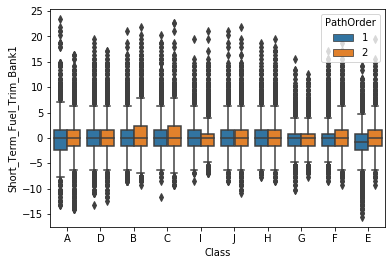

In [44]:
sns.boxplot(data=dataset, x='Class', y='Short_Term_Fuel_Trim_Bank1', hue='PathOrder')

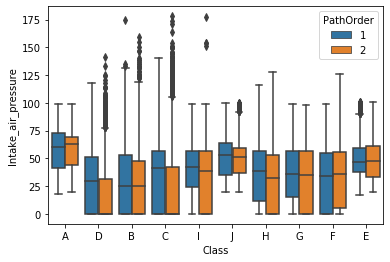

In [43]:
sns.boxplot(data=dataset, x='Class', y='Intake_air_pressure', hue='PathOrder')

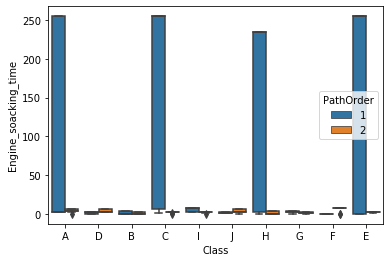

In [47]:
sns.boxplot(data=dataset, x='Class', y='Engine_soacking_time', hue='PathOrder')

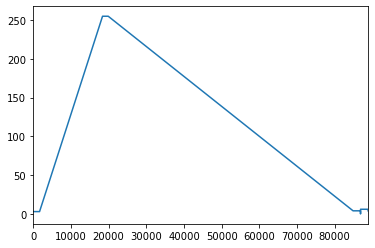

In [50]:
dataset[dataset.Class=='A'].Engine_soacking_time.plot()

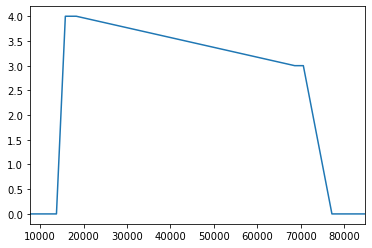

In [51]:
dataset[dataset.Class=='B'].Engine_soacking_time.plot()

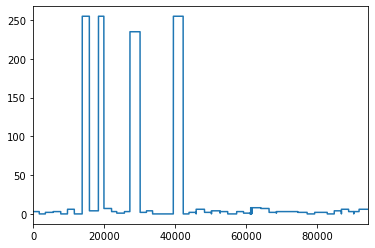

In [57]:
dataset.Engine_soacking_time.plot()

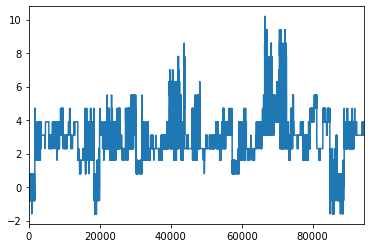

In [61]:
dataset.Long_Term_Fuel_Trim_Bank1.plot()

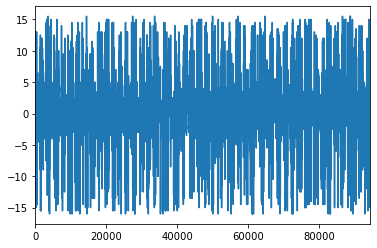

In [62]:
dataset.Calculated_road_gradient.plot()

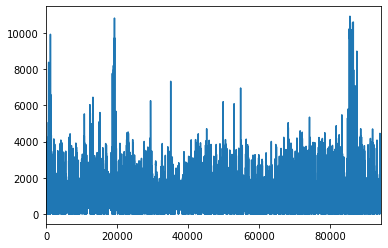

In [68]:
dataset.Fuel_consumption.plot()

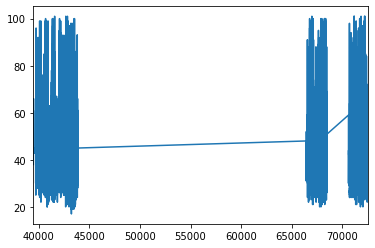

In [56]:
dataset[dataset.Class=='E'].Intake_air_pressure.plot()

In [46]:
list(dataset.columns)

['Fuel_consumption',
 'Accelerator_Pedal_value',
 'Throttle_position_signal',
 'Short_Term_Fuel_Trim_Bank1',
 'Intake_air_pressure',
 'Filtered_Accelerator_Pedal_value',
 'Absolute_throttle_position',
 'Engine_soacking_time',
 'Inhibition_of_engine_fuel_cut_off',
 'Engine_in_fuel_cut_off',
 'Fuel_Pressure',
 'Long_Term_Fuel_Trim_Bank1',
 'Engine_speed',
 'Engine_torque_after_correction',
 'Torque_of_friction',
 'Flywheel_torque_(after_torque_interventions)',
 'Current_spark_timing',
 'Engine_coolant_temperature',
 'Engine_Idel_Target_Speed',
 'Engine_torque',
 'Calculated_LOAD_value',
 'Minimum_indicated_engine_torque',
 'Maximum_indicated_engine_torque',
 'Flywheel_torque',
 'Torque_scaling_factor(standardization)',
 'Standard_Torque_Ratio',
 'Requested_spark_retard_angle_from_TCU',
 'TCU_requests_engine_torque_limit_(ETL)',
 'TCU_requested_engine_RPM_increase',
 'Target_engine_speed_used_in_lock-up_module',
 'Glow_plug_control_request',
 'Activation_of_Air_compressor',
 'Torque_conve